In [1]:
import numpy as np
import pandas as pd



In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [5]:
data = pd.read_csv(url)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve , roc_auc_score


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
datanew = pd.concat([data ,pd.get_dummies(data['Sex'])],axis = 1)

In [17]:
datanew.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [18]:
datanew.drop(['Sex'] , axis = 1 , inplace = True)

In [19]:
datanew.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [21]:
datanew.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
female           0
male             0
dtype: int64

In [24]:
datanew['Age'].fillna(data['Age'].mean() , inplace = True)

In [25]:
datanew.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
female           0
male             0
dtype: int64

In [26]:
datanew['Age'].fillna('S' , inplace = True)

In [39]:
X = pd.concat([datanew['Pclass'] ,datanew['Age'] ,datanew['male'] , datanew['female'] ,
                  datanew['SibSp'] , datanew['Parch'] , datanew['Fare'] ], axis = 1)

In [42]:
X.head()

,Pclass,Age,male,female,SibSp,Parch,Fare
0,3,22.0,1,0,1,0,7.2500
1,1,38.0,0,1,1,0,71.2833
2,3,26.0,0,1,0,0,7.9250
3,1,35.0,0,1,1,0,53.1000
4,3,35.0,1,0,0,0,8.0500


In [58]:
y = datanew['Survived']

In [44]:
S1 = StandardScaler()

In [45]:
X_scaled = S1.fit_transform(X)

In [46]:
X_scaled

array([[ 0.82737724, -0.5924806 ,  0.73769513, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [-1.56610693,  0.63878901, -1.35557354, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 0.82737724, -0.2846632 , -1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  0.        , -1.35557354, ...,  0.43279337,
         2.00893337, -0.17626324],
       [-1.56610693, -0.2846632 ,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 0.82737724,  0.17706291,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
clf1 = DecisionTreeClassifier()

In [63]:
x_train , x_test ,y_train ,  y_test = train_test_split(X_scaled , y , random_state = 355 , test_size = 0.30)

In [64]:
y_train

39     1
392    0
679    1
184    1
84     1
      ..
291    1
501    0
346    1
642    0
766    0
Name: Survived, Length: 623, dtype: int64

In [65]:
clf1.fit(x_train , y_train)

DecisionTreeClassifier()

In [66]:
clf1.score(x_train,y_train)

0.985553772070626

In [67]:
clf1.score(x_test , y_test)

0.7574626865671642

In [68]:
# Clearly data is overfitted

## Lets try with PCA

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [72]:
pca1 = PCA()

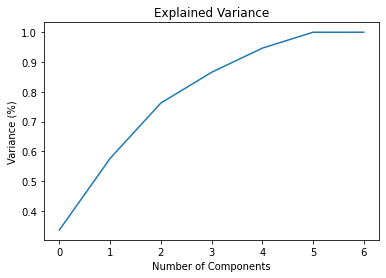

In [76]:
principalComponents = pca1.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [77]:
pca1 = PCA(n_components = 5)
new_data = pca1.fit_transform(X_scaled)

In [78]:
new_data = pd.DataFrame(new_data , columns = ['PCA1' , 'PCA2' , 'PCA3' , 'PCA4' , 'PCA5'])

In [79]:
new_data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-1.184296,-1.009306,0.269638,0.257530,-0.461028
1,2.019051,1.522341,-0.439666,0.055767,-0.912611
2,0.999109,-0.658984,-1.875385,0.104986,-0.145578
3,1.924202,1.252831,-0.582255,0.111506,-0.903739
4,-1.491131,-0.167078,-0.274206,-0.323107,0.079049


In [80]:
x_train , x_test, y_train , y_test = train_test_split(new_data , y ,random_state = 355 , test_size = 0.30 )

In [82]:
clf2 = DecisionTreeClassifier()

In [83]:
clf2.fit(x_train , y_train)

DecisionTreeClassifier()

In [84]:
clf2.score(x_train , y_train)

0.985553772070626

In [85]:
clf2.score(x_test ,y_test)

0.7164179104477612

## Lets try grid search

In [95]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best']
} 

In [96]:
grid_search = GridSearchCV(estimator=clf1,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [97]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best']})

In [98]:
best_parameters = grid_search.best_params_

In [99]:
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 6, 'splitter': 'best'}


In [100]:
clf3 = DecisionTreeClassifier(criterion='gini' , max_depth=4,
                             min_samples_leaf= 3 , min_samples_split=6,
                              splitter = 'best')

In [101]:
clf3.fit(x_train  , y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=6)

In [104]:
grid_search.best_score_

0.8137677419354838

In [105]:
clf3.score(x_test , y_test)

0.7761194029850746